# CS235 Project


The goal of this project is to correctly classify any particular pokemon’s type from the image of the pokemon or from other attributes of the pokemon using ConvNets and linear regression respectively.  There are a total of  eighteen different Pokémon types which include but are not limited to Poison, Ground, Rock, Bug, Ghost, Steel, and Fire to name a few. In addition, there are 8 attributes that all pokemon have for instance HP, Attack, and Defense. Furthermore, pokemon are not limited to one single type, some of them can have 2 types. This will make classifying both types more tricky since with only one type we would have 1/18 chance of getting it right if we guess, however with the addition of the second type we now have a 1/342 chance about being correct just by guessing.  In order to achieve decent performance we will need our models to find high other representations in of the data. We do not expect to get high performance, since even human performance in this data would be far from perfect. Some instances like Charmander are pretty obvious to be fire type  simply from the color and the flame on its tail however, some might confuse it for a dragon type as well which is incorrect.  One of the methods that we will be using is a convolutional neural network since it is known to achieve good performance on image classification task. The other method that we will be using will be logistic regression to on attribute data. We hope the a linear combination of  the attributes will be have some hints of the types of the pokemon but think that is unrealistic considering that the pokemon attributes are balanced. 

The two data sets can be found here:

[6036 label pokemon pictures ](https://www.kaggle.com/hannesrosenbusch/6036-labeled-pokemon-pictures#poke_image_data.npy)


[Better data all 7 Generations of Pokemon](https://github.com/udacity/AIPND/blob/master/Matplotlib/data/pokemon.csv)

<img src="Proposal image.jpg">




# TODO

Data Cleaning $\checkmark$

Data integration $\checkmark$

Data Augmentation $\checkmark$ 

Data statistics(Mode, Histograms, scatterplots, HeatMap)

Predictive models 
* k nearest neighbor
* Logistic Regression
* CovNet


In [1]:
#imports
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2
# %matplotlib inline
# plt.rcParams["figure.figsize"] = (16, 9) # (w, h)

## Data Integration
For Data integration, we plan to incorporate all different aspects of a pokemon from different datasets and see how this affects our classification. For example, while one dataset has the images of each pokemon, the other has some of their main attributes and pokedex numbers etc. We want to see how incorporating both sets vs using a single set will affect our classification


In [104]:
import os0
import numpy as np 
import pandas as pd 


#load files to integrate 
image_labels = pd.read_csv('old_image_lables.csv', usecols= ['Name'], header = 'infer')
stats_data = pd.read_csv('pokemon_final.csv', usecols= ['Name', 'Type 1', 'Type 2'], header = 'infer')

#Create out file with names maching images 
out_file = image_labels

#Appends the types to the name 
Type1 = pd.Series([])
Type2 = pd.Series([])
names = {'None missing'}
for i in range(len(image_labels)):
    row = None
    name = image_labels.iloc[i]['Name']
    if(((stats_data['Name']== name.lower()).any())):
        row = stats_data.loc[stats_data['Name']==name.lower()]
        Type1[i] = row.iat[0,1]
        Type2[i] = row.iat[0,2]
    else:
        #Display name of missing pokemon 
        names.add(name)
#Display all missing pokemon
print(names)
    
out_file.insert(loc=1, column = 'Type 1', value = Type1)
out_file.insert(loc=2, column = 'Type 2', value = Type2)

out_file.head()
    
out_file.to_csv('poke_image_labels.csv') #Write to file 


{'None missing'}


## Data augmentation
The dataset that we are using has 6036 images. Our goal is to use data augmentation to 10 fold the amount of images that we have by performing image manipulation like cropping, inverting, flipping, rotating, and increasing or decreasing the brightness, and saturation all the images. We hope that by doing this out convolutional neural network will become more robust and perform better on new data. 
We intend to make somewhere around 60k images and use 50k for training and 10k for testing. 


### Original Image

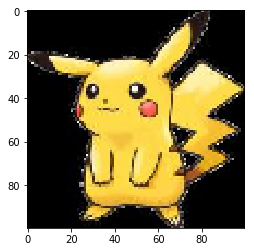

In [3]:
data = np.load('/home/onil/Documents/CS235/poke_image_data.npy')
image = data[3951] #pikachu
# #How do the images look like? Example:
example_pic = Image.fromarray(image, 'RGB')
plt.imshow(example_pic)

### First change the background of all images to white

(6036, 100, 100, 3)
(6036, 100, 100, 3)


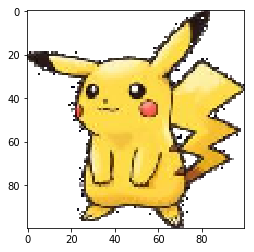

In [4]:
#read in data
labels = pd.read_csv('poke_image_labels.csv', header = 'infer')
data = np.load('/home/onil/Documents/CS235/poke_image_data.npy')

print(data.shape)
image = data[20]

new_images = []
for i in range(data.shape[0]):
    image = np.copy(data[i])
    #change image background 
    image[np.all(image <= [20, 20, 20], axis= 2)] = [255,255,255]
    new_images.append(image)

new_images = np.array(new_images)
print(new_images.shape)   
np.save("poke96k.npy", new_images)

image = new_images[3951] #pikachu

# #How do the images look like? Example:
example_pic = Image.fromarray(image, 'RGB')
plt.imshow(example_pic)

### Append horizotal flip images

(6036, 100, 100, 3)
(12072, 100, 100, 3)


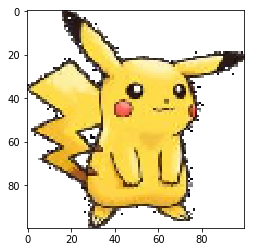

In [5]:
#read data
labels = pd.read_csv('poke_image_labels.csv', header = 'infer')
data = np.load('poke96k.npy')
print(data.shape)
image = data[1000]

#Flip images horizontally 
new_images = []
for i in range(data.shape[0]):
    image = np.copy(data[i])
    #change image background 
    image = image[:, ::-1]
    new_images.append(image)

new_images = np.array(new_images)
new_images = np.vstack((data, new_images))
print(new_images.shape)   
np.save("poke96k.npy", new_images)

image = new_images[3951+6036] #pikachu

example_pic = Image.fromarray(image, 'RGB')
plt.imshow(example_pic)


#Stack the lables 
labels = pd.concat([labels,labels], axis=0)
labels.to_csv('poke_image_labels_96k.csv')

### Change brightness 

(12072, 100, 100, 3)
(24144, 100, 100, 3)


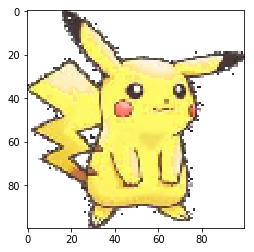

In [6]:
#read data
labels = pd.read_csv('poke_image_labels_96k.csv', header = 'infer')
data = np.load('poke96k.npy')
print(data.shape)
image = data[100]

brightness = 30
new_images = []
for i in range(data.shape[0]):
    image =np.copy(data[i])
    #apply brightness 
    image[image < [255-brightness,255-brightness,255-brightness]] += brightness
    new_images.append(image)

new_images = np.array(new_images)
new_images = np.vstack((data, new_images))
print(new_images.shape)   
np.save("poke96k.npy", new_images)

image = new_images[3951+6036*3]

example_pic = Image.fromarray(image, 'RGB')
plt.imshow(example_pic)

#Stack the lables 
labels = pd.concat([labels,labels], axis=0)
labels.to_csv('poke_image_labels_96k.csv')

### Crop images 10 px top 10 px left and 

(24144, 100, 100, 3)
(96576, 100, 100, 3)


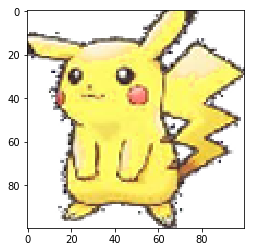

In [9]:
#read data
labels = pd.read_csv('poke_image_labels_96k.csv', header = 'infer')
data = np.load("poke96k.npy")
print(data.shape)
image1 = data[8]
image2 = data[8]
image3 = data[8]

new_images1 = []
new_images2 = []
new_images3 = []
for i in range(data.shape[0]):
    image1 = np.copy(data[i])
    image2 = np.copy(data[i])
    image3 = np.copy(data[i])
    image1 = cv2.resize(image1[10:100,10:100:], dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
    image2 = cv2.resize(image2[0:90,0:90:], dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
    image3 = cv2.resize(image3[10:90,10:90:], dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
    new_images1.append(image1)
    new_images2.append(image2)
    new_images3.append(image3)

new_images1 = np.array(new_images1)
new_images2 = np.array(new_images2)
new_images3 = np.array(new_images3)
new_images1 = np.vstack((data, new_images1, new_images2, new_images3))
print(new_images1.shape)   
np.save("poke96k.npy", new_images)

image3 = new_images1[3951+6036*6]
# example_pic = Image.fromarray(image[10:60,20:80:], 'RGB')
example_pic = Image.fromarray(image3, 'RGB')
plt.imshow(example_pic)

#Stack the lables 
labels = pd.concat([labels, labels, labels, labels], axis=0)
labels.to_csv('poke_image_labels_96k.csv')

### Final results

Name       Pikachu
Type 1    electric
Type 2         NaN
Name: 40167, dtype: object

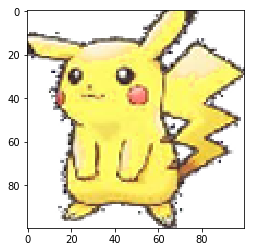

In [11]:

labels = pd.read_csv('poke_image_labels_96k.csv', header = 'infer')
data = np.load("poke96k.npy")

image3 = new_images1[3951+6036*6]
# example_pic = Image.fromarray(image[10:60,20:80:], 'RGB')
example_pic = Image.fromarray(image3, 'RGB')
plt.imshow(example_pic)

#How do the labels look like? Example:
labels.iloc[3951+6036*6]

# fig=plt.figure(figsize=(100, 100))
# for i in range(0, 50):
#     example_pic = Image.fromarray(data[i*5], 'RGB')
#     fig.add_subplot(5, 10, i+1)
#     plt.imshow(example_pic)
    
# plt.show()

## Nearest Neighbor
We will project our data onto a space and then use the nearest neighbor algorithm to see if we can classify distinct clusters as certain types.


In [ ]:
## code

## Logistic Regression 
We will use 1 vs all to train eighteen different logistic regression models with L2 regularization.  


In [ ]:
## code

## ConvNet
We will not develop our convolutional neural network from the ground up but instead use tensorflow with a gpu to speed up the training. 


In [1]:
###Test for Tensorflow install 


from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_images.shape

(60000, 28, 28)

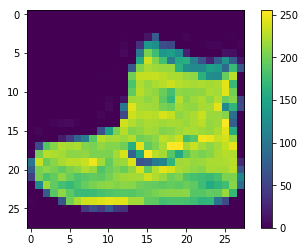

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.5010 - acc: 0.8247
Epoch 2/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3772 - acc: 0.8644
Epoch 3/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3358 - acc: 0.8785
Epoch 4/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3140 - acc: 0.8851
Epoch 5/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2969 - acc: 0.8912


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 24us/sample - loss: 0.3508 - acc: 0.8721
Test accuracy: 0.8721


In [11]:
predictions = model.predict(test_images)

In [12]:
predictions[0]

array([1.0471065e-05, 5.1213675e-07, 2.0124242e-08, 2.5944424e-09,
       2.8262159e-06, 1.4865506e-02, 4.2409596e-07, 6.7279581e-03,
       5.8647827e-05, 9.7833359e-01], dtype=float32)